<a href="https://colab.research.google.com/github/abegpatel/fbprophet-beerwineliquor-deep-learn-time-series-model/blob/master/facebook_prophat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/BeerWineLiquor.csv')

In [ ]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


**Format the Data**

In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

**Create and Fit Model**

In [ ]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Forecasting**

**Step 1: Create "future" placeholder dataframe¶**

In [ ]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [ ]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [ ]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [ ]:
len(df)

324

In [ ]:
len(future)

348

**Step 2: Predict and fill in the Future**

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1140.063796,1451.691631,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1176.726856,1521.119698,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1431.837485,1768.969588,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1411.793355,1748.514240,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1652.380233,1979.286340,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.232291,5062.072882,5397.070572,5190.210633,5211.841303,39.473660,39.473660,39.473660,39.473660,39.473660,39.473660,0.0,0.0,0.0,5240.705951
344,2020-09-01,5217.295945,4935.059619,5251.657827,5205.438098,5228.943246,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,0.0,0.0,0.0,5083.568322
345,2020-10-01,5232.841416,5026.653543,5356.439878,5219.914716,5245.835886,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,0.0,0.0,0.0,5189.273100
346,2020-11-01,5248.905070,5168.659109,5493.553081,5234.609597,5262.828113,87.524399,87.524399,87.524399,87.524399,87.524399,87.524399,0.0,0.0,0.0,5336.429469
347,2020-12-01,5264.450542,6177.277459,6502.945252,5249.382052,5279.699584,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,0.0,0.0,0.0,6334.992675


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4629.426372,4465.603363,4793.782989
337,2020-02-01,4680.226146,4523.530933,4841.317112
338,2020-03-01,4943.299086,4793.197383,5104.159035
339,2020-04-01,4941.866893,4769.255148,5093.360289
340,2020-05-01,5198.382732,5036.588669,5354.662376
341,2020-06-01,5178.976562,5006.309365,5343.719512
342,2020-07-01,5311.178497,5147.086425,5468.480327
343,2020-08-01,5240.705951,5062.072882,5397.070572
344,2020-09-01,5083.568322,4935.059619,5251.657827
345,2020-10-01,5189.273100,5026.653543,5356.439878


**Plotting Forecast**

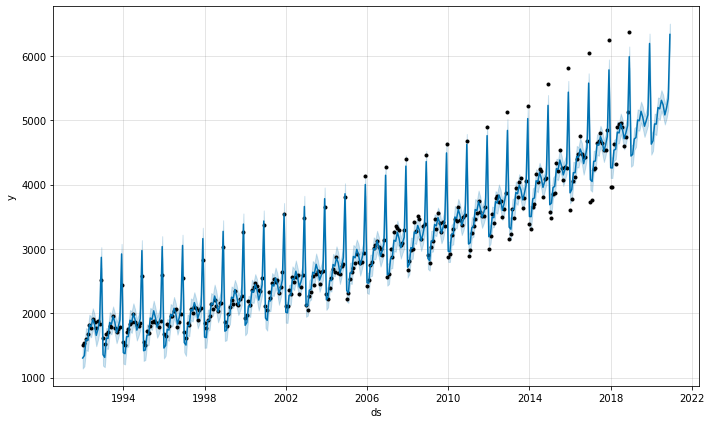

In [ ]:
m.plot(forecast);

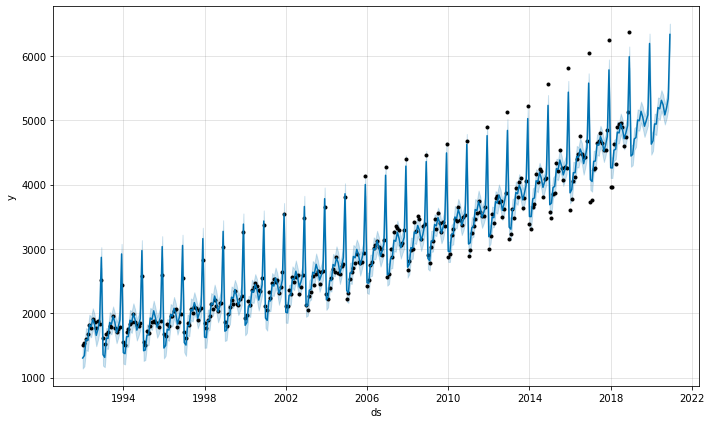

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast);



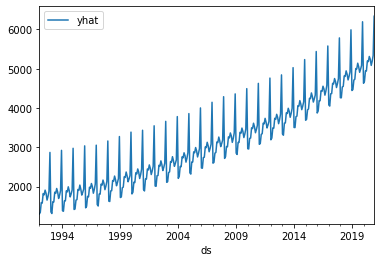

In [ ]:
forecast.plot(x='ds',y='yhat')

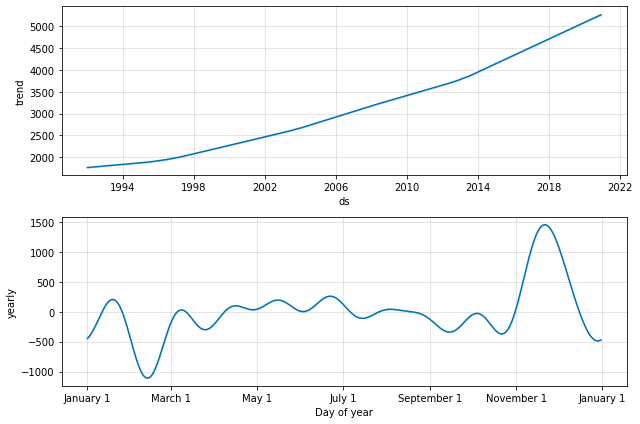

In [ ]:
m.plot_components(forecast);

**Forecast Evaluations**
**Classic Train/Test Split¶**

In [ ]:
df = pd.read_csv('/content/BeerWineLiquor.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [ ]:
df.columns = ['ds','y']

In [ ]:
 #YOU CAN SAFELY IGNORE THIS COPY WARNING
# CHECK THE DOCS LINK FOR MORE INFO ON THIS COPY WARNING
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


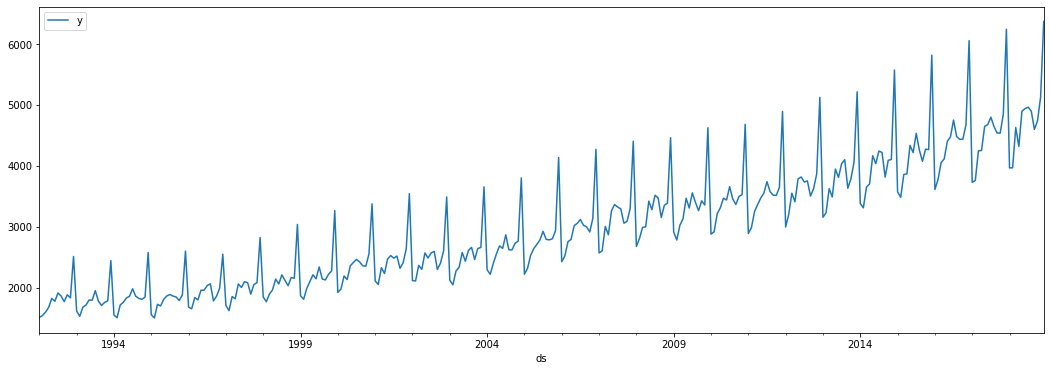

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

324

In [ ]:
len(df) - 12

312

In [ ]:
train = df.iloc[:312]
test = df.iloc[312:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
319,2018-08-01,4805.933359,4677.493621,4994.848815,4803.333755,4808.671309,35.665758,35.665758,35.665758,35.665758,35.665758,35.665758,0.0,0.0,0.0,4841.599117
320,2018-09-01,4821.411441,4544.419250,4873.568437,4818.168084,4824.732391,-118.140153,-118.140153,-118.140153,-118.140153,-118.140153,-118.140153,0.0,0.0,0.0,4703.271288
321,2018-10-01,4836.390230,4644.979177,4948.644104,4832.466506,4840.396894,-45.730352,-45.730352,-45.730352,-45.730352,-45.730352,-45.730352,0.0,0.0,0.0,4790.659878
322,2018-11-01,4851.868311,4735.849541,5045.847504,4847.193008,4856.581355,38.252031,38.252031,38.252031,38.252031,38.252031,38.252031,0.0,0.0,0.0,4890.120342
323,2018-12-01,4866.847100,5805.324530,6124.261530,4861.283354,4872.410743,1087.435623,1087.435623,1087.435623,1087.435623,1087.435623,1087.435623,0.0,0.0,0.0,5954.282722


In [ ]:
test.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


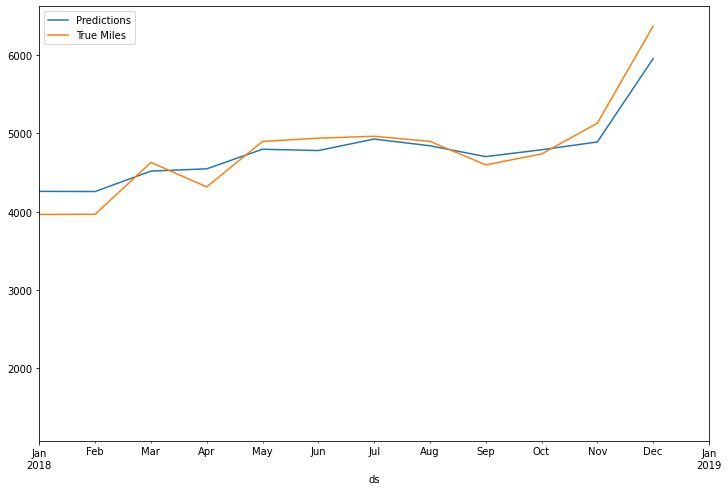

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [ ]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
predictions = forecast.iloc[-12:]['yhat']

In [ ]:
predictions

312    4259.681023
313    4257.289588
314    4518.079192
315    4547.249656
316    4797.429009
317    4780.470643
318    4927.475288
319    4841.599117
320    4703.271288
321    4790.659878
322    4890.120342
323    5954.282722
Name: yhat, dtype: float64

In [ ]:
test['y']

312    3965
313    3967
314    4629
315    4317
316    4897
317    4939
318    4963
319    4898
320    4598
321    4737
322    5130
323    6370
Name: y, dtype: int64

In [ ]:
rmse(predictions,test['y'])

208.21399567327987

In [ ]:
test.mean()

y    4784.166667
dtype: float64

In [ ]:
predictions.mean()

4772.30064551103

**Prophet Diagnostics**

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
len(df)

324

In [ ]:
len(df)/12

27.0

In [ ]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [ ]:
initial

'1825 days'

In [ ]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 4 forecasts with cutoffs between 2001-12-05 00:00:00 and 2016-12-01 00:00:00


In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-01-01,2300.660326,2230.453616,2375.422078,2114,2001-12-05
1,2002-02-01,2251.509727,2176.258527,2325.756657,2109,2001-12-05
2,2002-03-01,2436.561511,2361.639049,2509.075615,2366,2001-12-05
3,2002-04-01,2470.403051,2387.532492,2538.925193,2300,2001-12-05
4,2002-05-01,2618.293399,2542.058239,2693.866972,2569,2001-12-05


In [ ]:
len(df_cv)#.tail()

48

In [ ]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,65105.767099,255.158318,242.708726,0.083829,0.083551,0.00
1,58 days,61472.503411,247.936491,231.671076,0.078647,0.073459,0.00
2,59 days,57802.449181,240.421399,219.487808,0.073745,0.073188,0.00
3,60 days,44659.931058,211.328964,174.480426,0.058415,0.058037,0.25
4,62 days,32968.035224,181.571020,157.217670,0.053616,0.058037,0.25
5,86 days,29135.511325,170.691275,139.230616,0.044179,0.039163,0.50
6,87 days,27590.285826,166.103238,132.364112,0.040272,0.031349,0.75
7,89 days,28095.624996,167.617496,136.318388,0.040957,0.031349,0.75
8,90 days,7010.272283,83.727369,82.854114,0.026044,0.025538,1.00
9,117 days,13024.840542,114.126424,107.814499,0.037111,0.027064,0.75


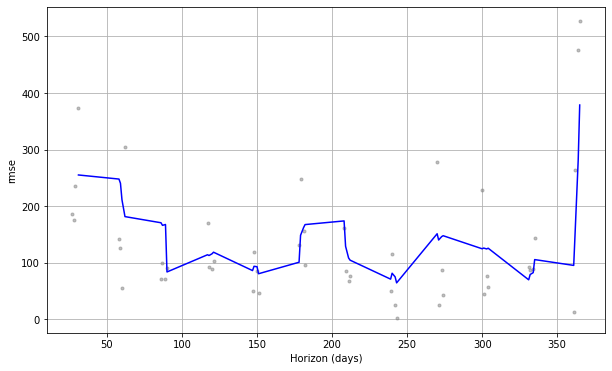

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

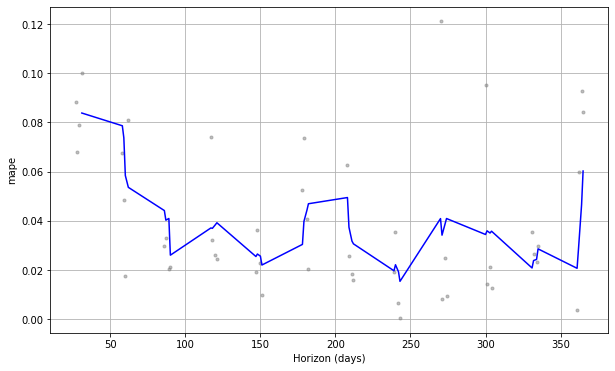

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape');

**Trend Changes**

In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/HospitalityEmployees.csv')

In [ ]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

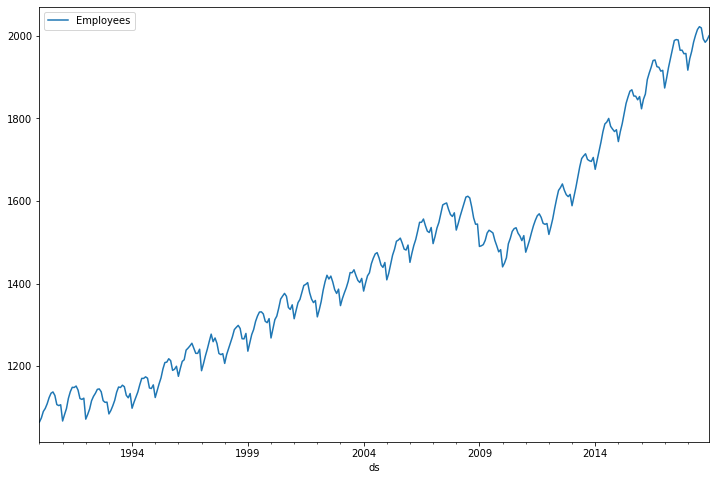

In [ ]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [ ]:
len(df)

348

In [ ]:
len(df)-12

336

In [ ]:
train = df.iloc[:336]
test = df.iloc[336:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


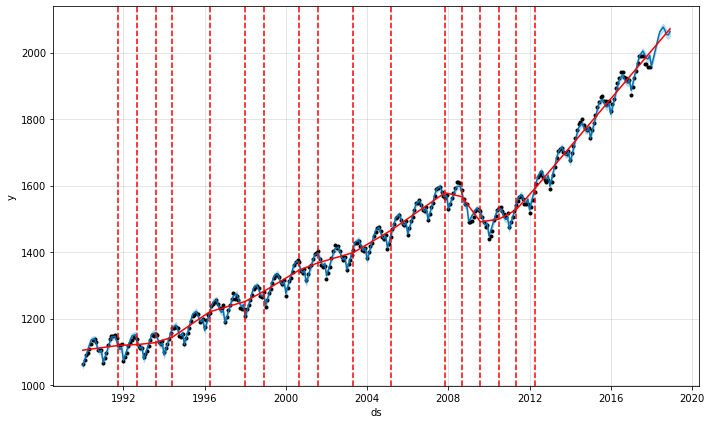

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

**Changing Seasonality**

In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/airline_passengers.csv')

In [ ]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


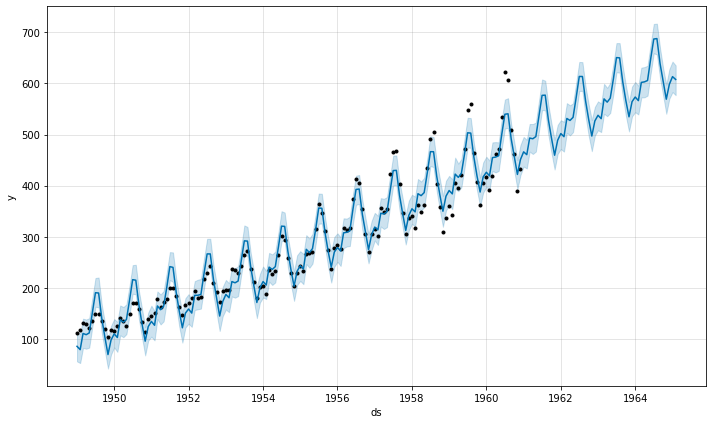

In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

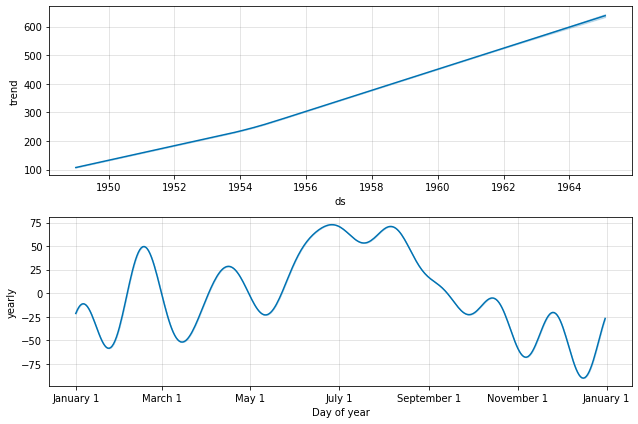

In [ ]:
fig = m.plot_components(forecast)

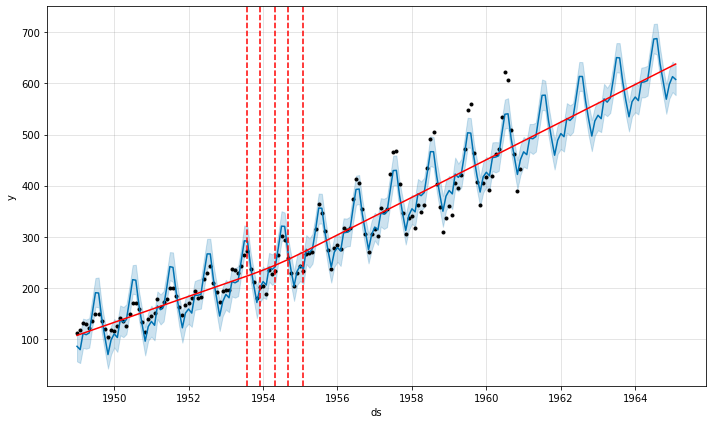

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

**Change to Multiplicative**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


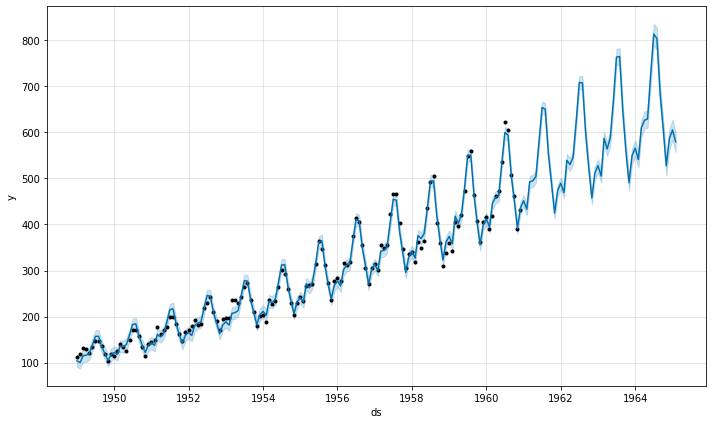

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

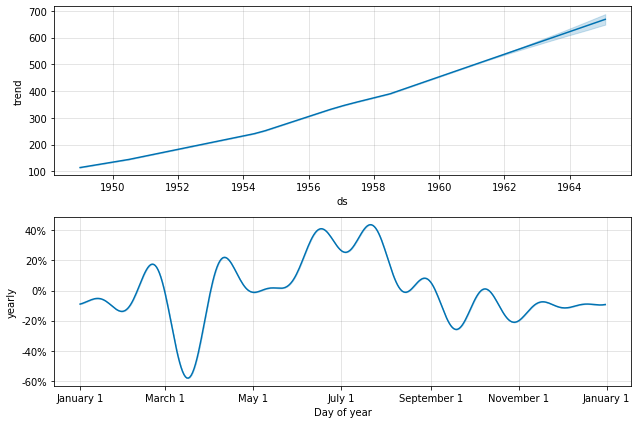

In [ ]:
fig = m.plot_components(forecast);

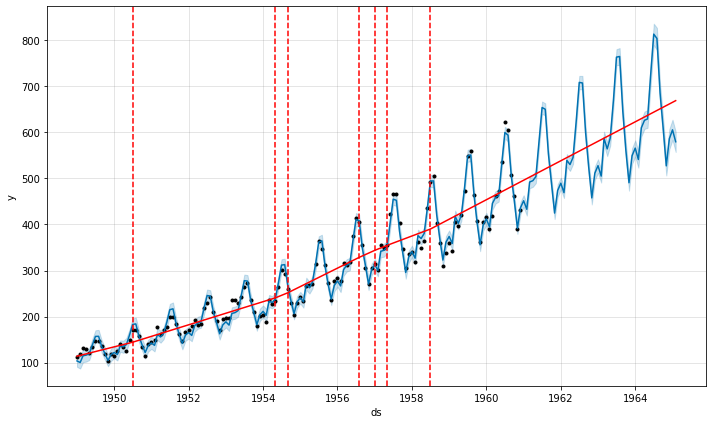

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)